In [279]:
from pyspark.sql import SparkSession
from pyspark import *

In [280]:
sparkSession = SparkSession.builder.appName("example-pyspark-read-and-write").getOrCreate()

In [281]:
df_load = sparkSession.read.csv('hdfs://localhost:9000/user/BTL/data/khoa_hoc_co_ban.csv', header = True)
# Please change the path to the directory where the Hadoop is stored to your path

In [282]:
df_load.select("Tác giả").show()

+--------------------+
|             Tác giả|
+--------------------+
|     Fredrik Backman|
|      Elyakim Kislev|
|Kang Sang Wook, L...|
|     Madeline Miller|
|             Bắc Nam|
|    Shizukui Shusuke|
|       Nhiều tác giả|
|        Jim B Tucker|
|        Gari Chapman|
|        Damon Galgut|
|      Jeffery Deaver|
| Thích Nữ Nhuận Bình|
|       Steven Pinker|
|         Miura Shion|
|     Astrid Lindgren|
|      Phạm Phú Quảng|
|Alex Alpha – Huyề...|
|       Nhiều tác giả|
|    Suzanne M Paling|
|         Whon Jaehun|
+--------------------+
only showing top 20 rows



In [283]:
df_load = df_load.toPandas()

In [284]:
display(df_load)

,_c0,Tieu de,Tác giả,Người dịch,Nhà xuất bản,Nhà phát hành,Mã Sản phẩm,Giấy phép XB,Khối lượng,Ngôn ngữ,Định dạng,Kích thước,Ngày phát hành,Số trang
0,0,Người Đàn Ông Mang Tên Ove,Fredrik Backman,Fredrik Backman,Nxb Trẻ,NXB Trẻ,8934974182375,NaN,NaN,Tiếng Việt,Bìa mềm,13 x 20 cm,2022,452
1,1,Mối Quan Hệ 5.0,Elyakim Kislev,NaN,NXB Công Thương,NaN,8935280913110,NaN,610.00 gam,Tiếng Việt,Bìa mềm,24 x 15.5 cm,2023,360
2,2,Đừng Chết Bởi Hóa Chất (Tái Bản 2022),"Kang Sang Wook, Lee Jun Young",NaN,Nxb Thế giới,NaN,8935280912397,NaN,500.00 gam,Tiếng Việt,Bìa mềm,20.5 x 14 cm,2022,256
3,3,Circe,Madeline Miller,NaN,NXB Kim Đồng,NXB Kim Đồng,8935244874488,NaN,750.00 gam,Tiếng Việt,Bìa mềm,22.5 x 14.5 cm,2022,528
4,4,Toái Ngọc Đầu Châu,Bắc Nam,NaN,Nxb Hà Nội,AZ Việt Nam,8935325003264,-QĐ/HN,950.00 gam,Tiếng Việt,Bìa mềm,20.5 x 14.5 cm,2022,928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,25,Hướng Dẫn Qui Định Tiêu Chuẩn Chế Độ Chỉ Tiêu ...,NaN,NaN,Nxb Lao động,Pháp Luật,8935077104813,NaN,1430.00 gam,NaN,Bìa cứng,20x28 cm,04/2011,487
12296,26,Trang Điểm Móng Theo Mùa - Kiểu Móng 12 Chòm Sao,Hân Vi,NaN,Nxb Tổng hợp TP.HCM,Minh Tâm,978048557119,NaN,440.00 gam,NaN,Bìa mềm,16.6 x 22.3 cm,03/2011,128
12297,27,Dạ Vũ Từ Địa Ngục - Tập Truyện Ngắn,NaN,Phùng Nguyễn,Nxb Trẻ,NXB Trẻ,8934974100546,NaN,242.00 gam,NaN,Bìa mềm,13 x 20 cm,03/2011,264
12298,28,Thủy Cung Sôi Động - Cuốn Sách Nhỏ Về Đại Dương,NaN,NaN,NXB Kim Đồng,NXB Kim Đồng,8935036632166,NaN,110.00 gam,NaN,Bìa cứng,14.7 x 14.7 cm,12/2010,11


In [285]:
type(df_load)

pandas.core.frame.DataFrame

In [286]:
X = []
Y = []


len = df_load.shape[0]
for i in range(len):
    if df_load["Khối lượng"].values[i] != "NaN":
        df_load["Khối lượng"].values[i] = float(df_load["Khối lượng"].values[i].split(" ")[0])
        if df_load["Khối lượng"].values[i] != "NaN" and df_load["Số trang"].values[i].isdigit():
            X.append(float(df_load["Khối lượng"].values[i]))
            Y.append(int(df_load["Số trang"].values[i]))

NXB visualization


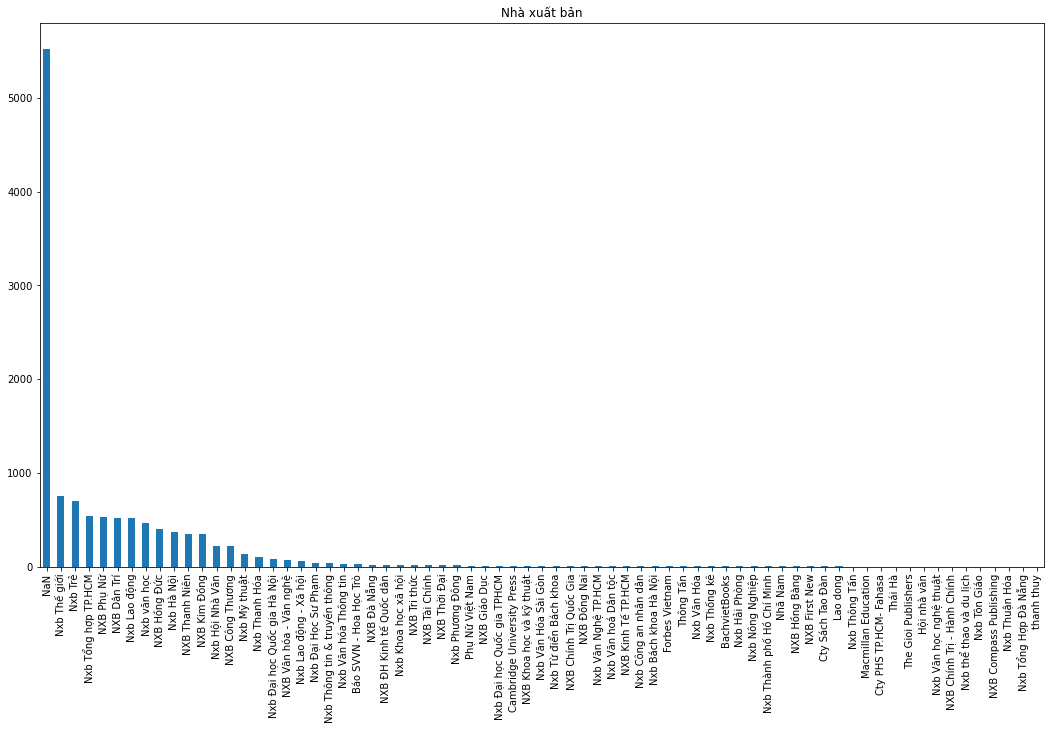

In [287]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (18,10)

v = "Nhà xuất bản"

print('NXB visualization')
df_load = df_load.sort_values(by=[v])
df_load[v].value_counts().plot(kind = 'bar')
plt.title(v)
plt.show()

Giấy Phép XB visualization


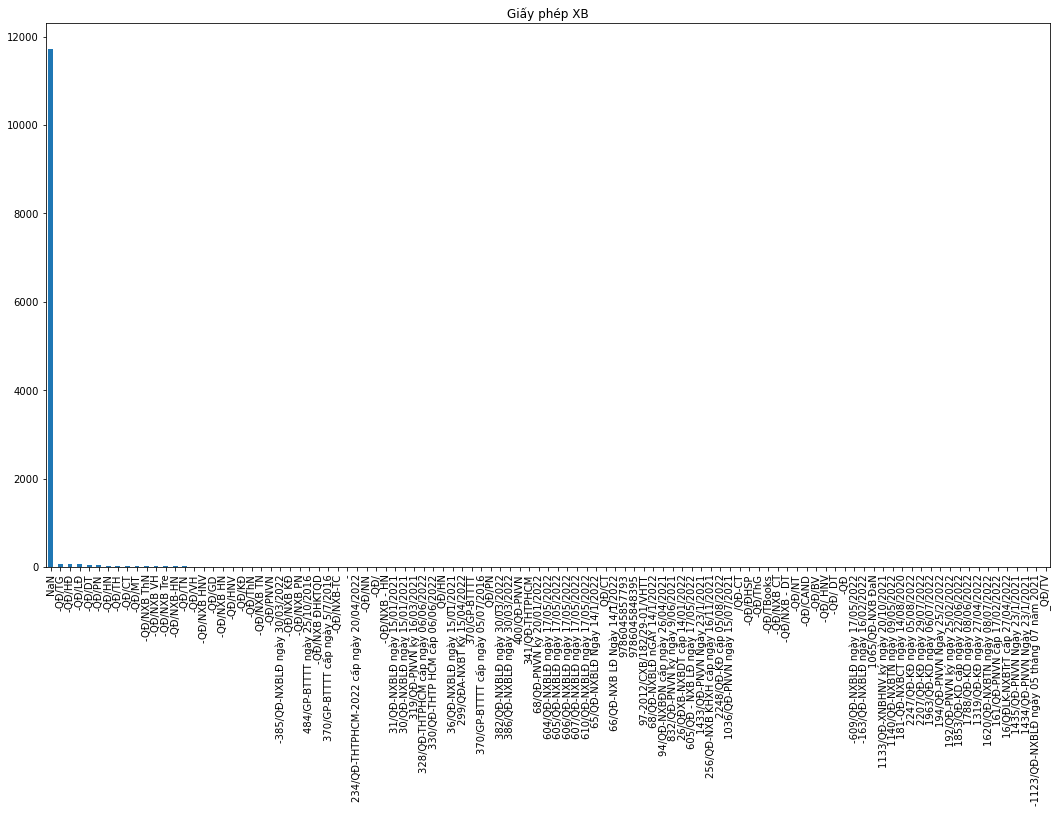

In [288]:
v = "Giấy phép XB"

print('Giấy Phép XB visualization')
df_load = df_load.sort_values(by=[v])
df_load[v].value_counts().plot(kind = 'bar')
plt.title(v)
plt.show()

Phân bố khối lượng _ số trang visualization


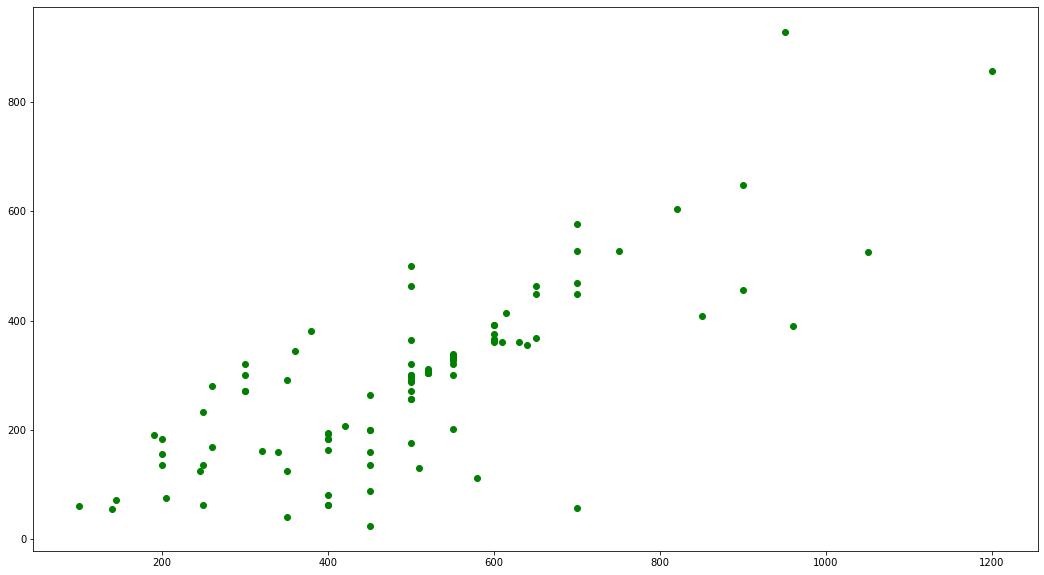

In [289]:
print('Phân bố khối lượng _ số trang visualization')
plt.scatter(X[:100], Y[:100], c ="green")

# To show the plot
plt.show()

In [290]:
# Những sách ngôn ngữ không xác định => default = Tiếng Việt

for i in range(len):
    if df_load["Ngôn ngữ"].values[i].startswith("Tiếng") == False:
        df_load["Ngôn ngữ"].values[i] = "Tiếng Việt"

Ngôn ngữ visualization


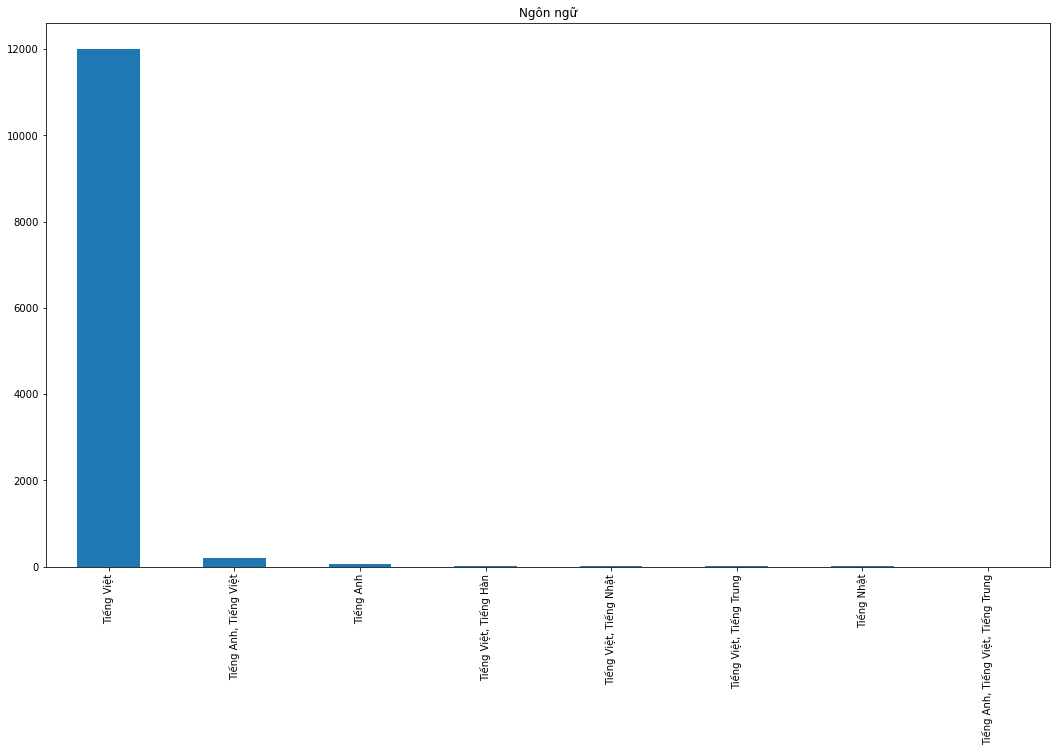

In [291]:
v = "Ngôn ngữ"

print('Ngôn ngữ visualization')
df_load = df_load.sort_values(by=[v])
df_load[v].value_counts().plot(kind = 'bar')
plt.title(v)
plt.show()

['Tiếng Anh 0.48%', 'Tiếng Anh, Tiếng Việt 1.54%', 'Tiếng Anh, Tiếng Việt, Tiếng Trung 0.01%', 'Tiếng Nhật 0.02%', 'Tiếng Việt 97.63%', 'Tiếng Việt, Tiếng Hàn 0.17%', 'Tiếng Việt, Tiếng Nhật 0.09%', 'Tiếng Việt, Tiếng Trung 0.07%']


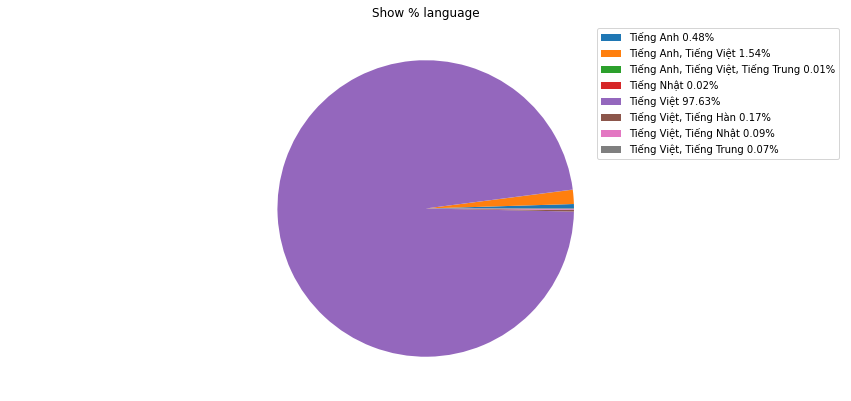

In [292]:
langs = {}
count = 0
for i in range(len):
    x = df_load["Ngôn ngữ"].values[i]
    if x not in langs:
        langs[x] = 1
        count += 1
    else:
        langs[x] += 1

keys = list(langs.keys())
for i in range(count):
    keys[i] = keys[i] + " " + str(round(langs[keys[i]] * 100.0 / len, 2)) + "%"

print(keys)
        
fig = plt.figure(4, figsize=(15,15))
ax = fig.add_subplot(211) 
ax.set_title('Show % language')
ax.axis("equal")
pie = ax.pie(list(langs.values()), startangle=0)
ax2 = fig.add_subplot(211)
ax2.axis("off") 
ax2.legend(pie[0], keys, loc="best")

In [293]:
for i in range(len):
    if df_load["Định dạng"].values[i].startswith("Bìa") == False:
        df_load["Định dạng"].values[i] = "NaN"

Định dạng visualization


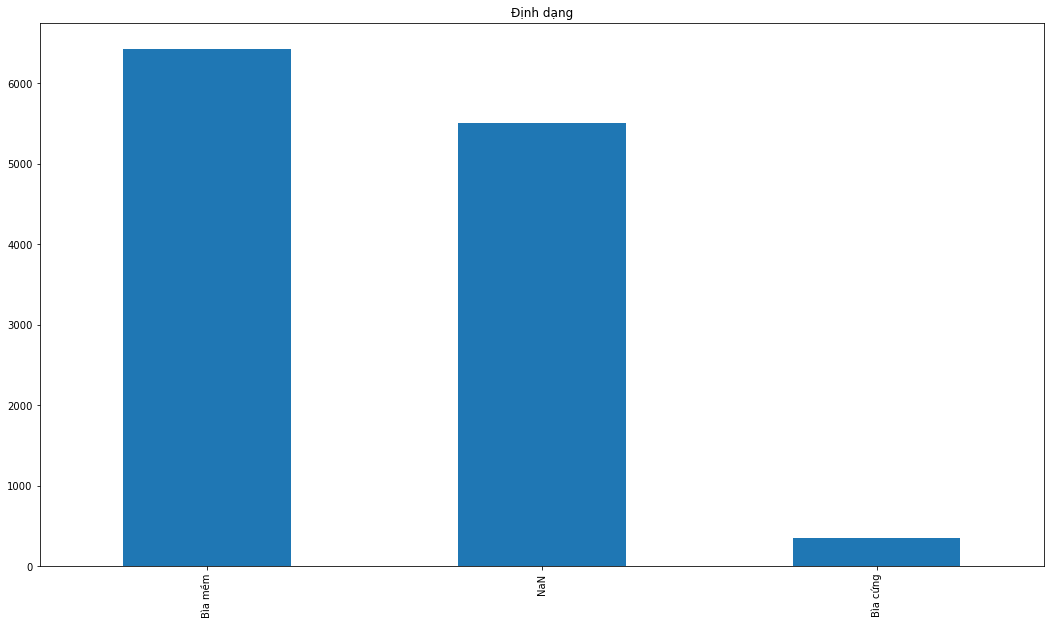

In [294]:
v = "Định dạng"

print('Định dạng visualization')
df_load = df_load.sort_values(by=[v])
df_load[v].value_counts().plot(kind = 'bar')
plt.title(v)
plt.show()